In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/ASUS/Desktop/MINI_project/Data_p/preprocessed.csv")


In [2]:
df.drop(columns=["RISK_MM"], inplace=True)

# Features and target
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"].astype(int)

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM: (samples, timesteps, features)
X_seq = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y, test_size=0.2, random_state=42)


In [3]:
# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)


D:\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8090 - loss: 0.4313 - val_accuracy: 0.8380 - val_loss: 0.3710
Epoch 2/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8388 - loss: 0.3736 - val_accuracy: 0.8381 - val_loss: 0.3686
Epoch 3/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8395 - loss: 0.3701 - val_accuracy: 0.8437 - val_loss: 0.3630
Epoch 4/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8409 - loss: 0.3678 - val_accuracy: 0.8406 - val_loss: 0.3649
Epoch 5/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8399 - loss: 0.3690 - val_accuracy: 0.8365 - val_loss: 0.3694
Epoch 6/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8412 - loss: 0.3669 - val_accuracy: 0.8445 - val_loss: 0.3594
Epoch 7/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8451 - loss: 0.3605 - val_accuracy: 0.8449 - val_loss: 0.3587
Epoch 8/20
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8427 - loss: 0.3623 - 

In [6]:
# Evaluation
acc = accuracy_score(y_test, y_pred)
prec_1 = precision_score(y_test, y_pred)
prec_0 = precision_score(y_test, y_pred, pos_label=0)
rec_1 = recall_score(y_test, y_pred)
rec_0 = recall_score(y_test, y_pred, pos_label=0)
f1_1 = f1_score(y_test, y_pred)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred)
gmean = np.sqrt(rec_1 * rec_0)

LSTM Results:
Accuracy       : 0.85
Precision (1)  : 0.73
Precision (0)  : 0.87
Recall (1)     : 0.49
Recall (0)     : 0.95
F1 Score (1)   : 0.59
F1 Score (0)   : 0.91
G-Mean         : 0.68
ROC AUC Score  : 0.87

Confusion Matrix:
 [[20941  1157]
 [ 3230  3111]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.73      0.49      0.59      6341

    accuracy                           0.85     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.84      0.85      0.83     28439



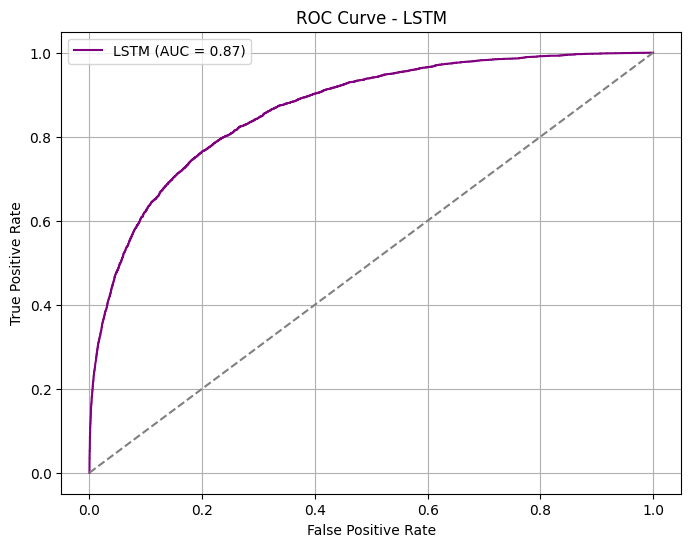

In [7]:
# Print results
print("LSTM Results:")
print(f"Accuracy       : {acc:.2f}")
print(f"Precision (1)  : {prec_1:.2f}")
print(f"Precision (0)  : {prec_0:.2f}")
print(f"Recall (1)     : {rec_1:.2f}")
print(f"Recall (0)     : {rec_0:.2f}")
print(f"F1 Score (1)   : {f1_1:.2f}")
print(f"F1 Score (0)   : {f1_0:.2f}")
print(f"G-Mean         : {gmean:.2f}")
print(f"ROC AUC Score  : {auc:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"LSTM (AUC = {auc:.2f})", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LSTM")
plt.legend()
plt.grid(True)
plt.show()